# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Importar Bibliotecas e Bases de Dados

In [5]:
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

### Consolidar Base de Dados

In [6]:
meses = {'jan' : 1, 'fev' : 2, 'mar': 3, 'abr' : 4, 'mai' : 5, 'jun' : 6, 'jul' : 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez' : 12}

caminho_bases= pathlib.Path('dataset')
bases = []

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]

    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))

    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    bases.append(df)

base_airbnb = pd.concat(bases)
display(base_airbnb)

C:\Users\vinic\AppData\Local\Temp\ipykernel_4736\3745062433.py:13: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\vinic\AppData\Local\Temp\ipykernel_4736\3745062433.py:13: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\vinic\AppData\Local\Temp\ipykernel_4736\3745062433.py:13: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\vinic\AppData\Local\Temp\ipykernel_4736\3745062433.py:13: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\vinic\AppData\Local\Temp\ipykernel_4736\3745062433.py:13: DtypeWarning: Columns (61,62,94) have mixed types.

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

- Como temos muitas colunas, nosso modelo pode acabar ficando muito lento.
- Além disso, uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir-las da nossa base de dados
- Tipos de colunas que vamos excluir:
    1. ID's, Links e informações não relevantes para o modelo
    2. Colunas repetidas ou extremamente parecidas com outra (dão a mesma informação para o modelo). Ex: Data x Ano/Mês
    3. Colunas preenchidas com texto livre -> Não rodaremos nenhuma análise de palavra ou algo do tipo.
    4. Colunas que todos, ou quase todos, valores são iguais
    5. 
    6. 
- Para isso, vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa

### Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

In [7]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv("primeiros_registros.csv", sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Depois da análise qualitativa, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [8]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes'
]

In [9]:
base_airbnb = base_airbnb.loc[: , colunas]
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

### Tratar Valores Faltando

- Visualizando os dados, percemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300000 valores NaN foram excluídas da análise.
- Para as outras colunas, como temos muitos dados (mais de 900000 linhas), vamos excluir as linhas que contém dados NaN.

In [10]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [11]:
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [12]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

- Como 'price' e 'extra people' estão sendo reconhecidos como objetos (ao invés de float), temos que mudar o tipo de variável da coluna

In [13]:
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)


In [14]:
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

- Vamos basicamente olhar feature por feature para:
    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir
    
- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

- Depois vamos analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)

- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

MAS CUIDADO: não saia excluindo direto outliers, pense exatamente no que você está fazendo. Se não tem um motivo claro para remover o outlier, talvez não seja necessário e pode ser prejudicial para a generalização. Então tem que ter uma balança ai. Claro que você sempre pode testar e ver qual dá o melhor resultado, mas fazer isso para todas as features vai dar muito trabalho.

Ex de análise: Se o objetivo é ajudar a precificar um imóvel que você está querendo disponibilizar, excluir outliers em host_listings_count pode fazer sentido. Agora, se você é uma empresa com uma série de propriedades e quer comparar com outras empresas do tipo também e se posicionar dessa forma, talvez excluir quem tem acima de 6 propriedades tire isso do seu modelo. Pense sempre no seu objetivo

<Axes: >

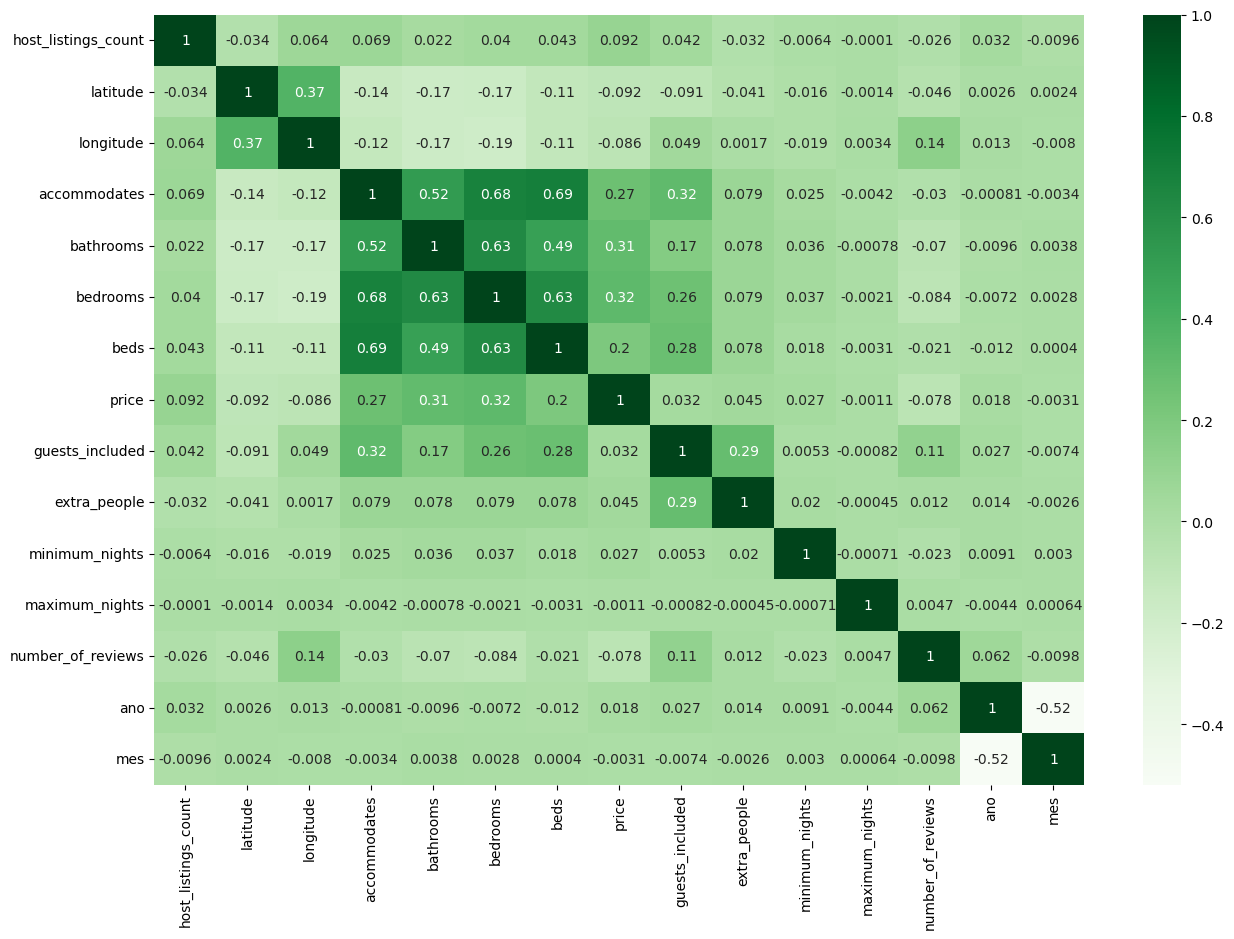

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(numeric_only=True), annot=True , cmap='Greens')

#print(base_airbnb.corr(numeric_only=True))


### Definição de funções para Análise de Outliers
Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [16]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return (q1 - 1.5 * amplitude), (q3 + 1.5 * amplitude)

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[ (df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0] #valor novo do dataframe da linha de cima
    return df,linhas_removidas

In [47]:
def diagrama_caixa(coluna):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim((limites(coluna)))
    sns.boxplot(x=coluna,ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.histplot(coluna, kde=True, stat='density')

def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    color = sns.color_palette("dark", len(coluna.value_counts().index))
    ax = sns.barplot(x=coluna.value_counts().index , y=coluna.value_counts(), hue= coluna.value_counts().index, palette= color)
    ax.set_xlim((limites(coluna)))


## Tratamento de colunas de valores de números contínuos

### Price

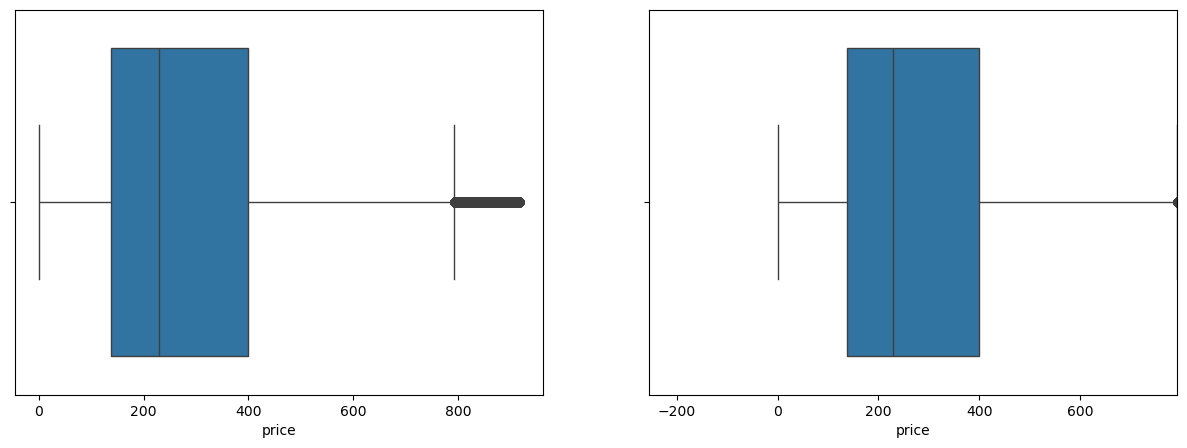

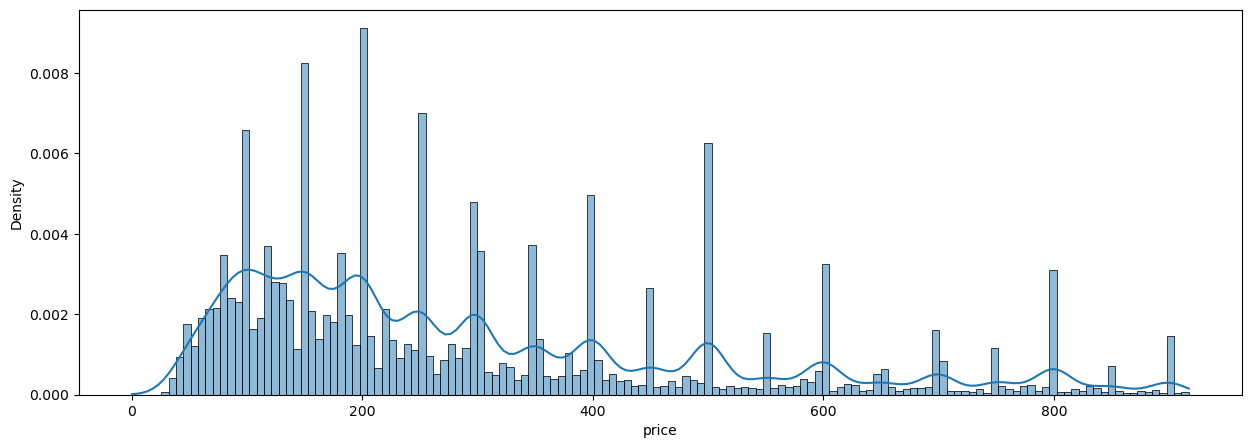

In [40]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo principal. Por isso, podemos excluir esses outliers

In [41]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'price')
print(f'{linhas_removidas} linhas removidas')

23707 linhas removidas


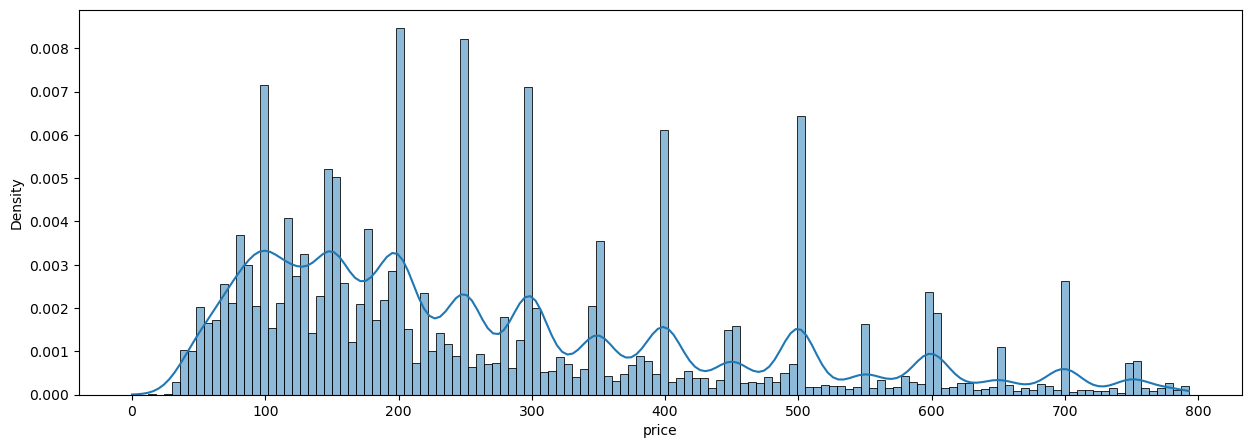

In [42]:
histograma(base_airbnb['price'])

### Extra_people

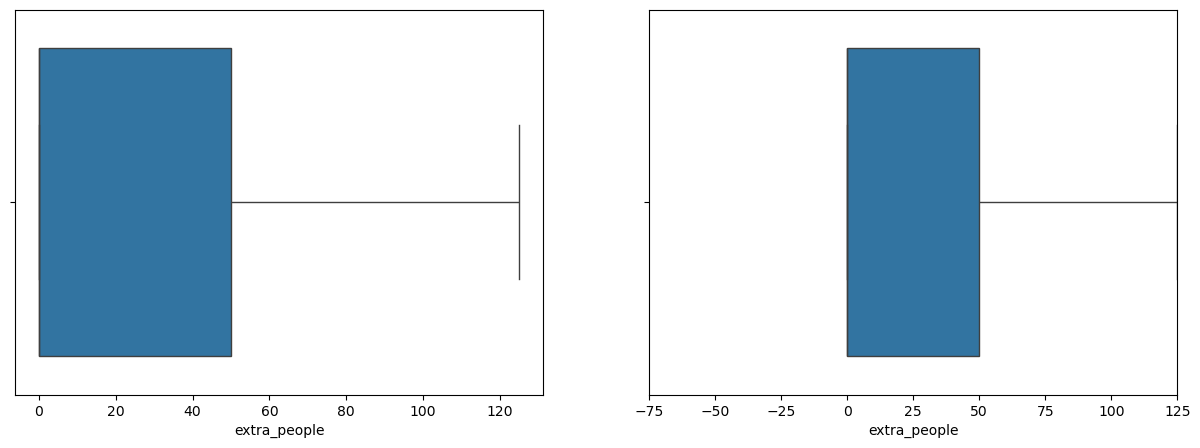

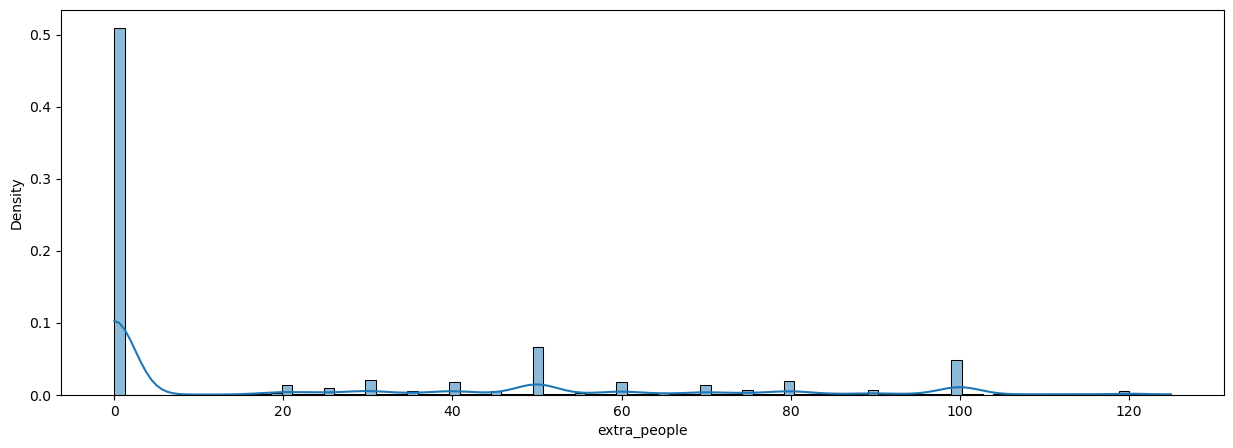

In [43]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [44]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'extra_people')
print(f'{linhas_removidas} linhas removidas')

0 linhas removidas


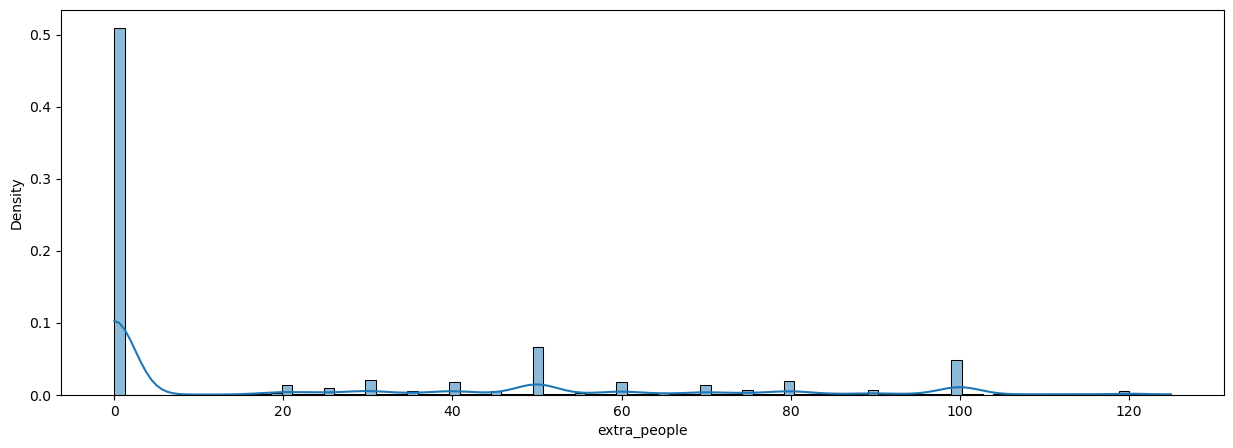

In [45]:
histograma(base_airbnb['extra_people'])

## Tratamentos de colunas de valores discretos

### host_listings_count

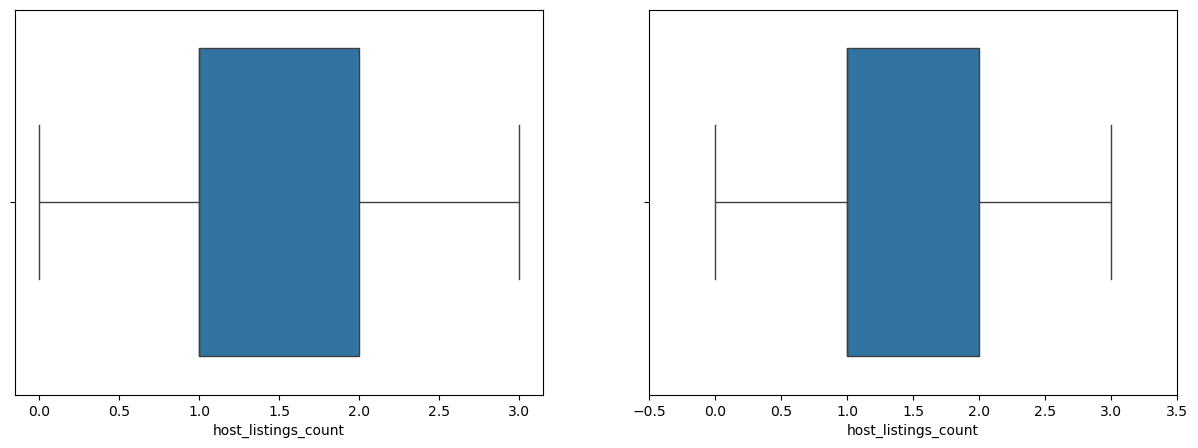

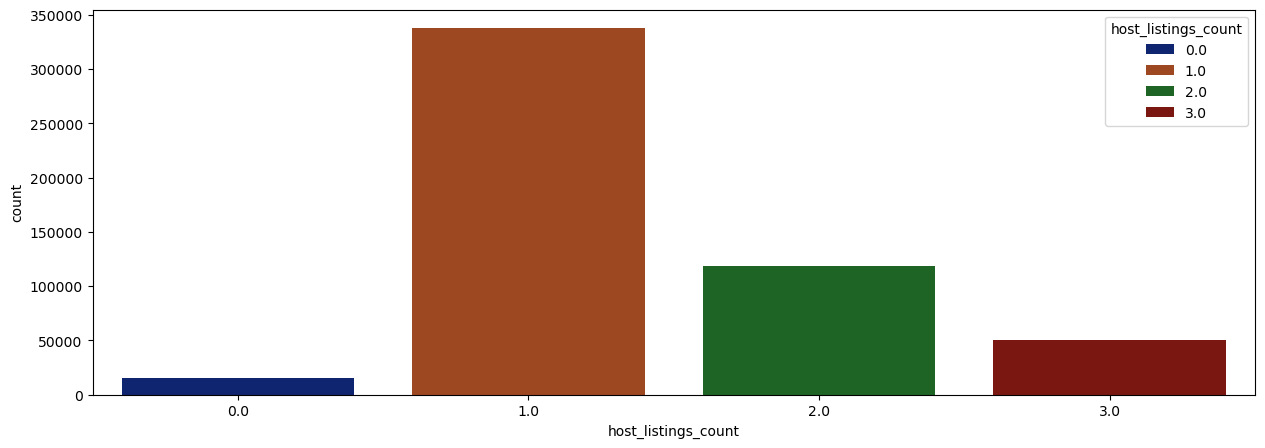

In [48]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Podemos excluir os outliers, porque hosts com mais de 6 imóveis no airbnb não é o público alvo do projeto(imagino que sejam imobiliárias ou profissionais que gerenciam)

In [49]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

0 linhas removidas


### accommodates

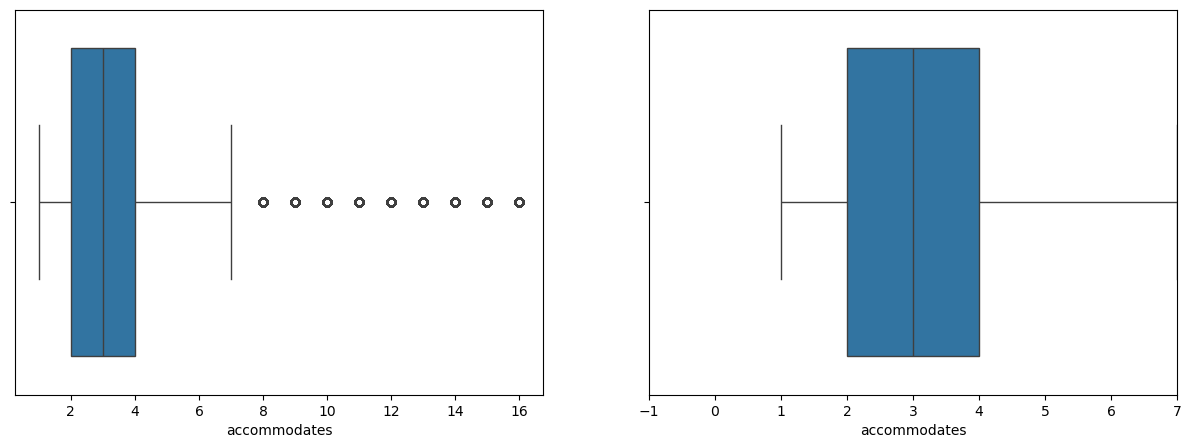

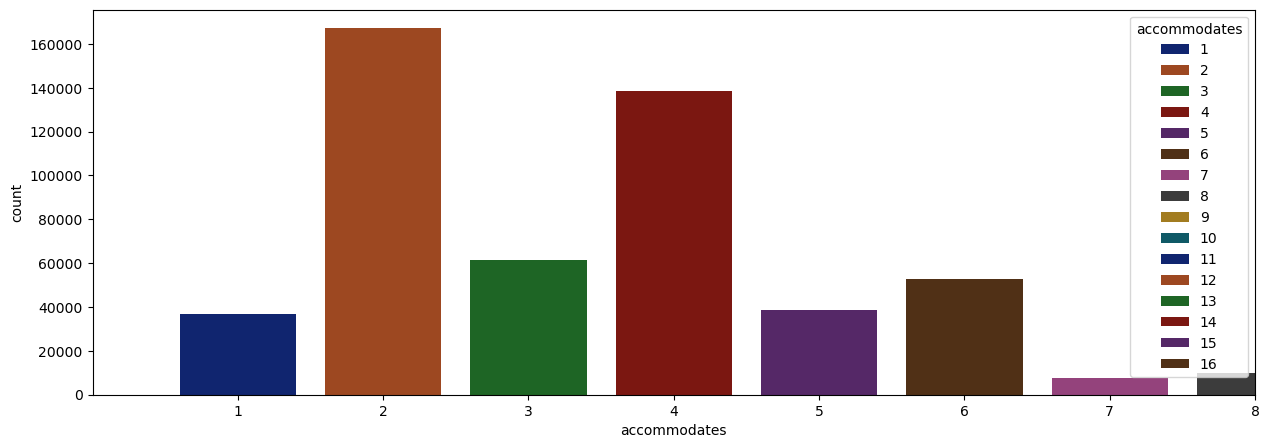

In [51]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [52]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'accommodates')
print(f'{linhas_removidas} linhas removidas')

18732 linhas removidas


### bathrooms

<Axes: xlabel='bathrooms', ylabel='count'>

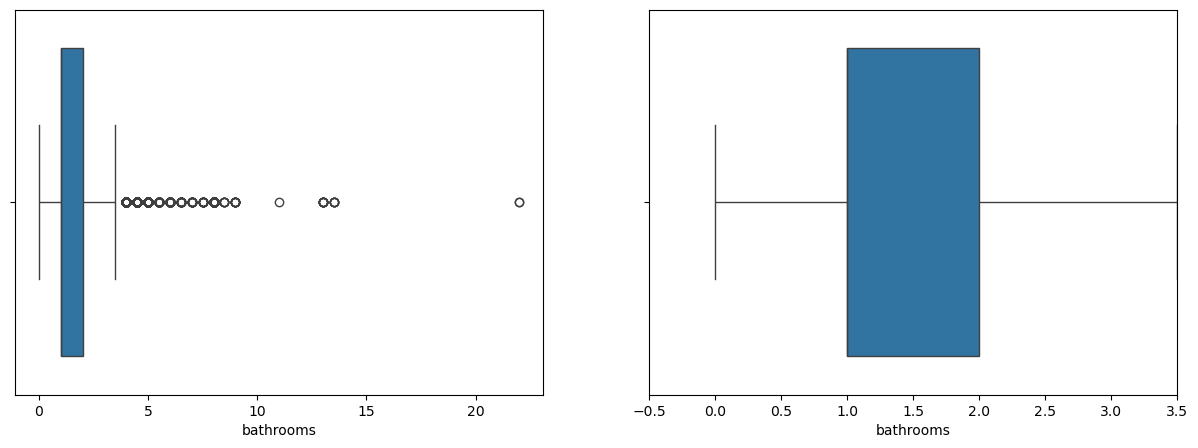

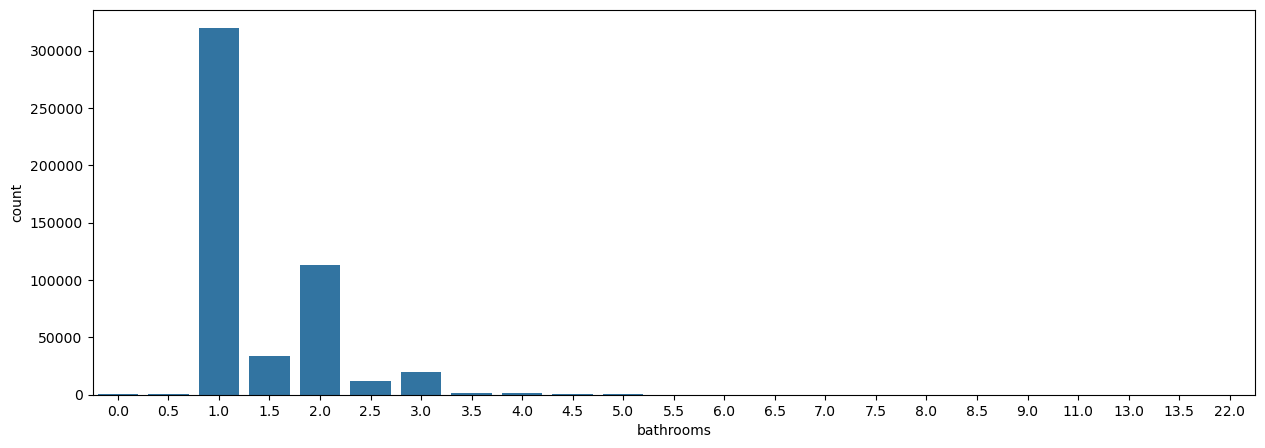

In [53]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index , y=base_airbnb['bathrooms'].value_counts())

In [54]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'bathrooms')
print(f'{linhas_removidas} linhas removidas')

2615 linhas removidas


### bedrooms

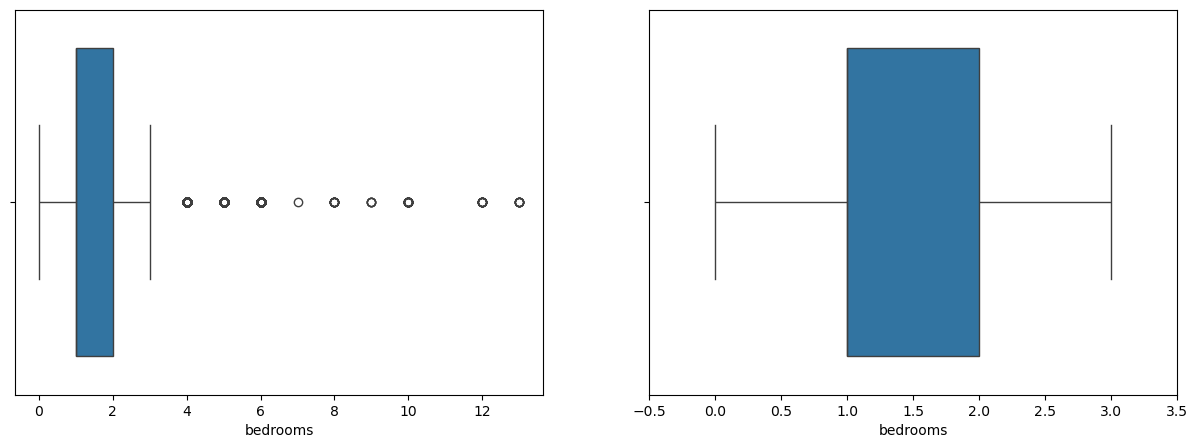

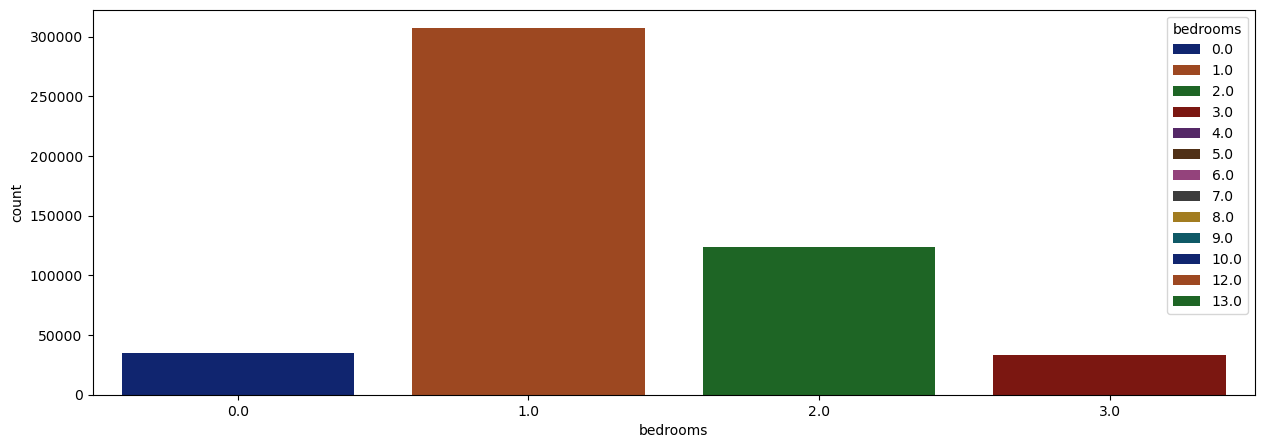

In [55]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [56]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'bedrooms')
print(f'{linhas_removidas} linhas removidas')

1661 linhas removidas


### beds

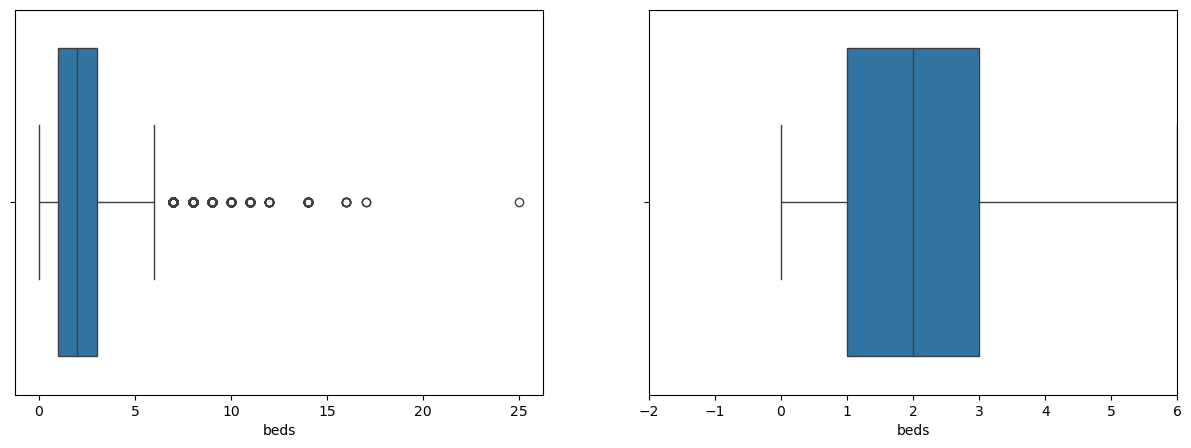

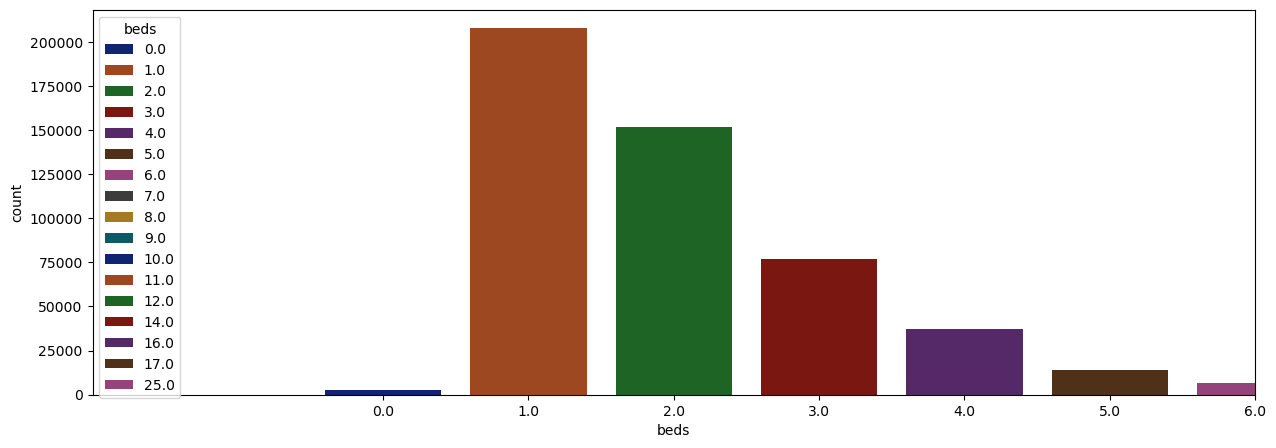

In [57]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [58]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'beds')
print(f'{linhas_removidas} linhas removidas')

1692 linhas removidas


### guests_included

<Axes: xlabel='guests_included', ylabel='count'>

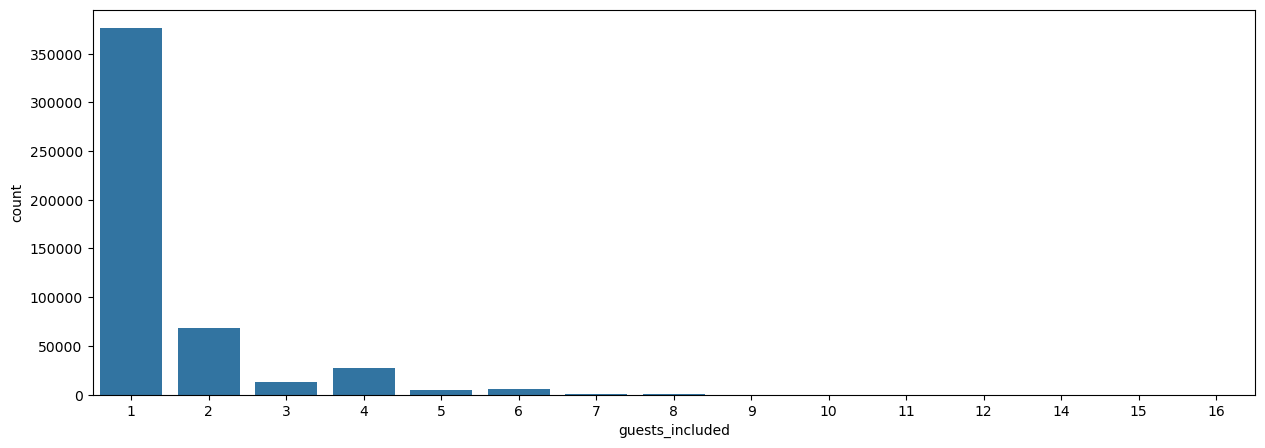

In [59]:
#diagrama_caixa(base_airbnb['guests_included'])
#grafico_barra(base_airbnb['guests_included'])

plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index , y=base_airbnb['guests_included'].value_counts())

Vamos remover essa featura da análise. Parece que os usuários usam muito o valor padrão como 1 guest included. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço. Por isso, me parece melhor excluir a coluna da análise.

In [60]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)

### minimum_nights

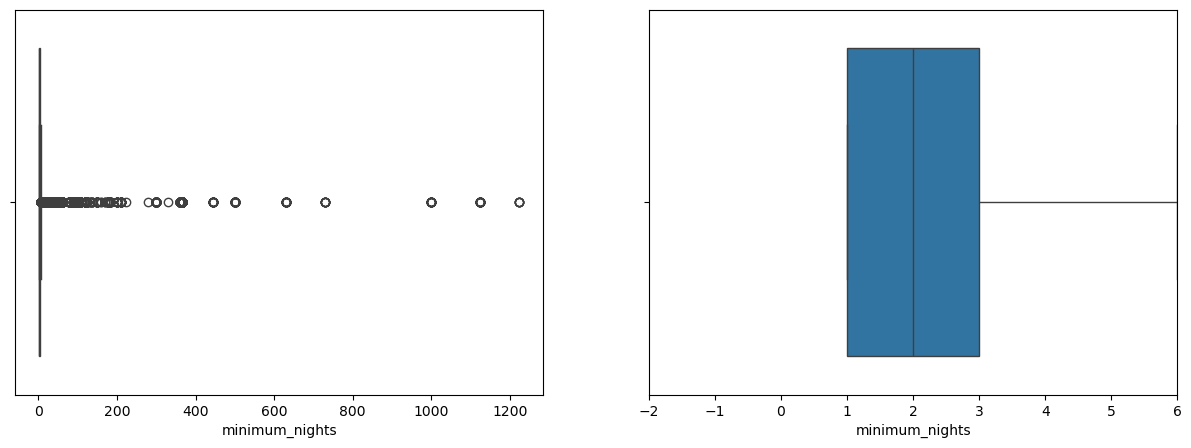

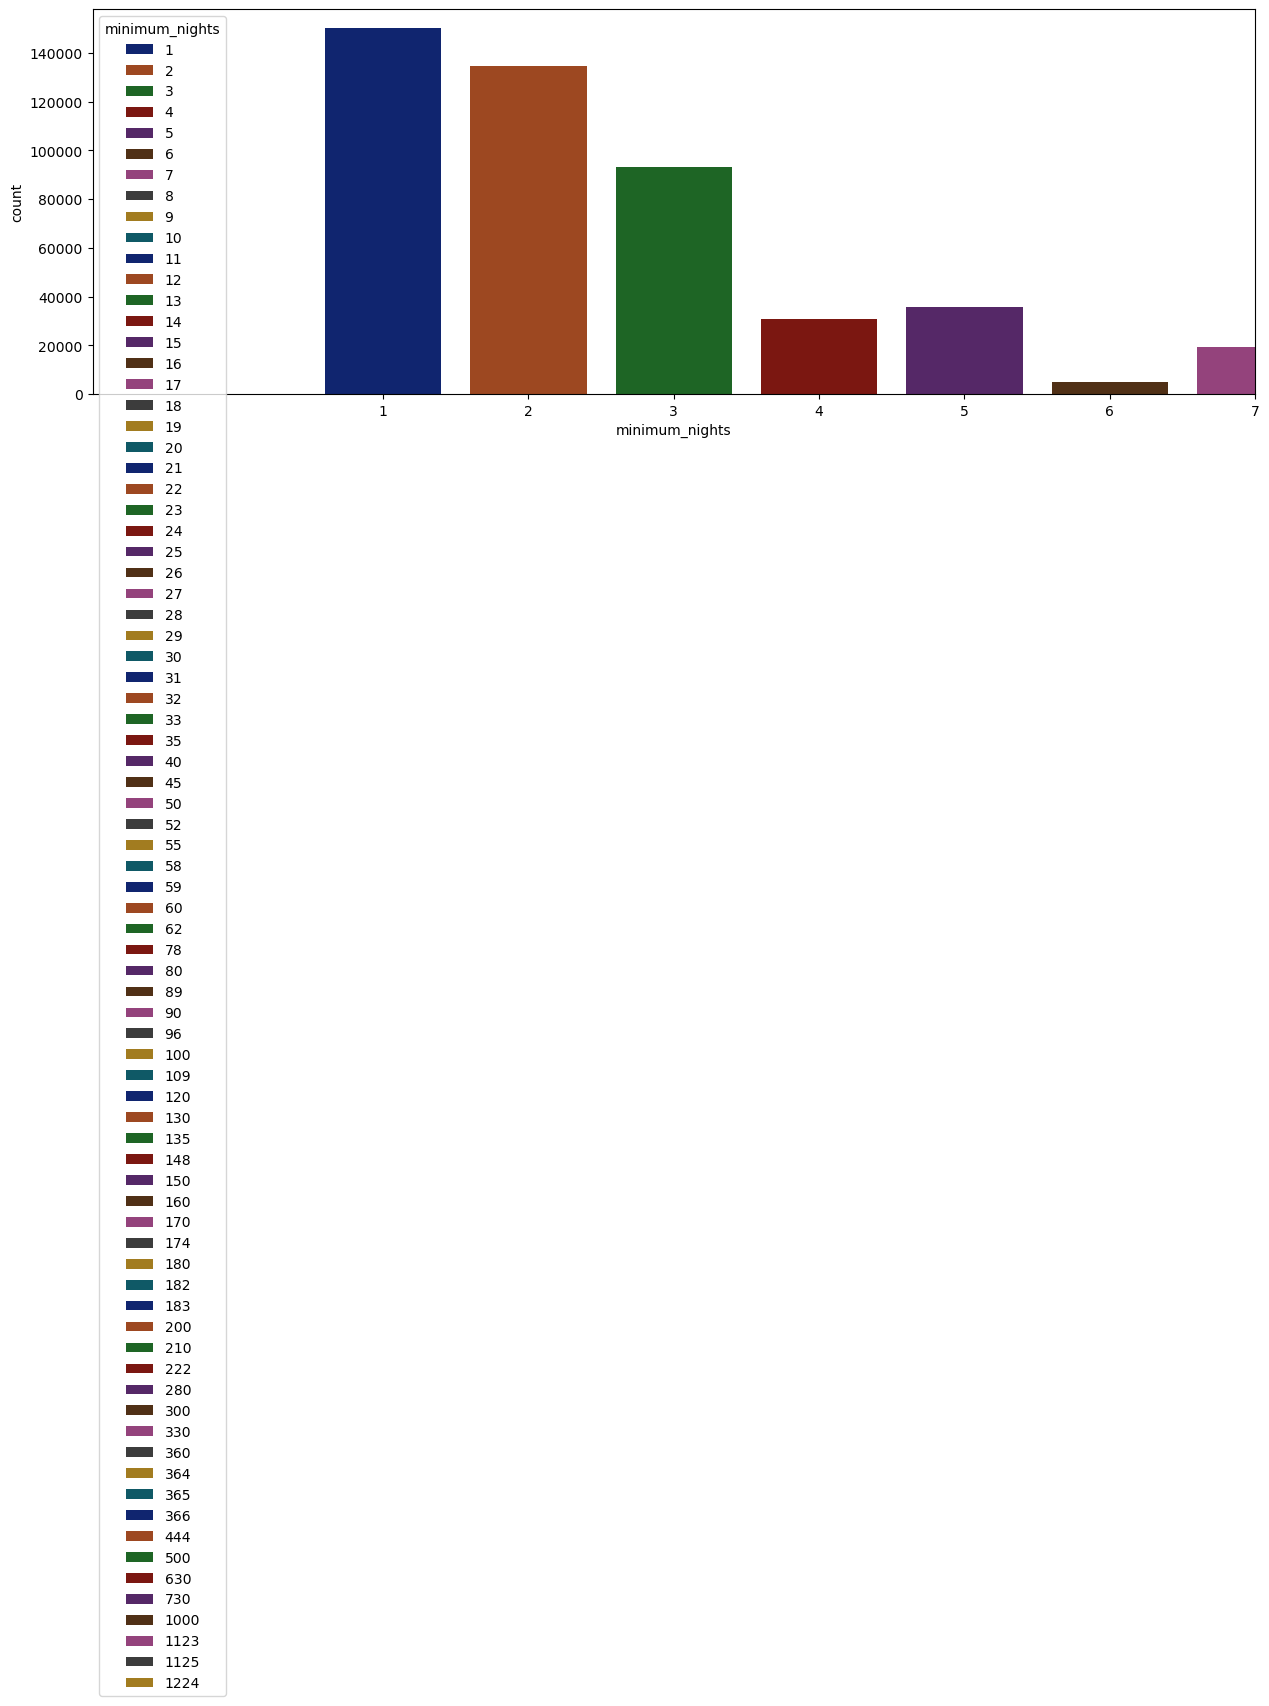

In [61]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [62]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

47361 linhas removidas


### maximum_nights

In [63]:
#diagrama_caixa(base_airbnb['maximum_nights'])
#grafico_barra(base_airbnb['maximum_nights'])

base_airbnb = base_airbnb.drop('maximum_nights', axis=1)

### number_of_reviews

In [64]:
#diagrama_caixa(base_airbnb['number_of_reviews'])
#grafico_barra(base_airbnb['number_of_reviews'])

base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)

## Tratamento de colunas de valores de texto

### property_type

property_type
Apartment                 355145
House                      39167
Condominium                21511
Loft                       10084
Serviced apartment         10022
Guest suite                 2975
Bed and breakfast           1755
Guesthouse                  1597
Hostel                      1550
Other                       1345
Villa                       1095
Townhouse                    649
Aparthotel                   486
Tiny house                   347
Earth house                  344
Chalet                       316
Casa particular (Cuba)       253
Hotel                        237
Boutique hotel               177
Dorm                         138
Bungalow                     132
Cottage                      122
Cabin                        104
Treehouse                     57
Castle                        45
Nature lodge                  45
Island                        45
Campsite                      34
Hut                           33
Camper/RV                    

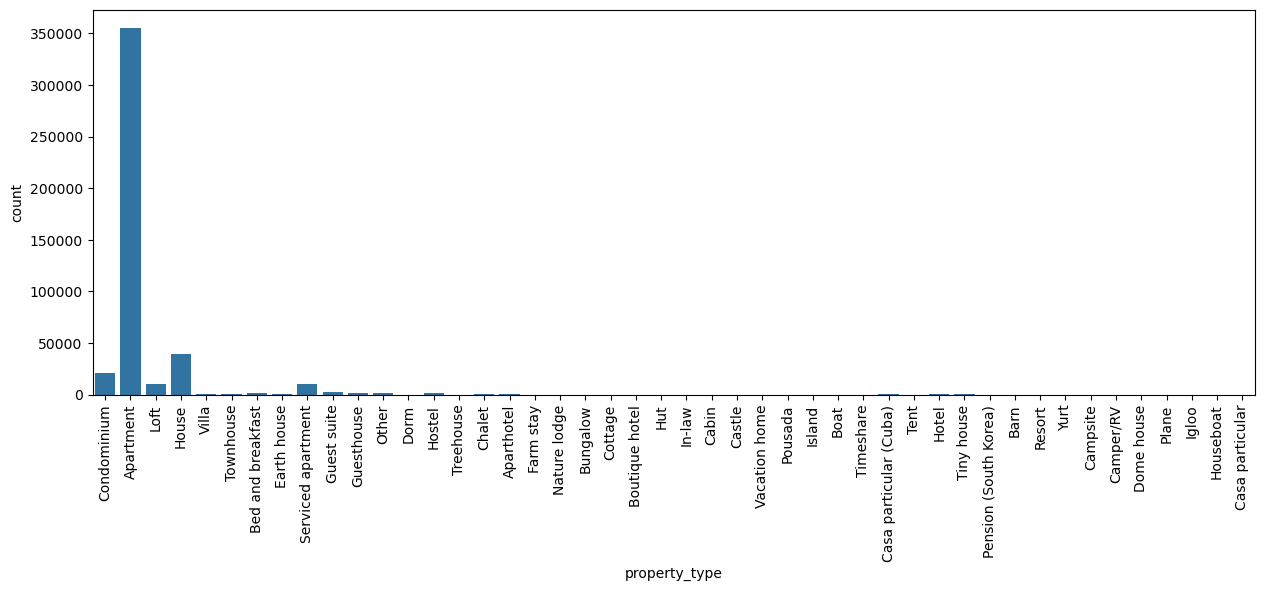

In [65]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['property_type'])
grafico.tick_params(axis='x',rotation= 90)

In [66]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []
for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type'] == tipo , ['property_type']] = 'Outros'

print(base_airbnb['property_type'].value_counts())

['Bed and breakfast', 'Guesthouse', 'Hostel', 'Other', 'Villa', 'Townhouse', 'Aparthotel', 'Tiny house', 'Earth house', 'Chalet', 'Casa particular (Cuba)', 'Hotel', 'Boutique hotel', 'Dorm', 'Bungalow', 'Cottage', 'Cabin', 'Treehouse', 'Castle', 'Nature lodge', 'Island', 'Campsite', 'Hut', 'Camper/RV', 'Yurt', 'Resort', 'Boat', 'Tent', 'Farm stay', 'Barn', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Houseboat', 'Timeshare', 'Pousada', 'Plane', 'Casa particular']
property_type
Apartment             355145
House                  39167
Condominium            21511
Outros                 11075
Loft                   10084
Serviced apartment     10022
Guest suite             2975
Name: count, dtype: int64


### room_type

room_type
Entire home/apt    276926
Private room       163777
Shared room          8784
Hotel room            492
Name: count, dtype: int64


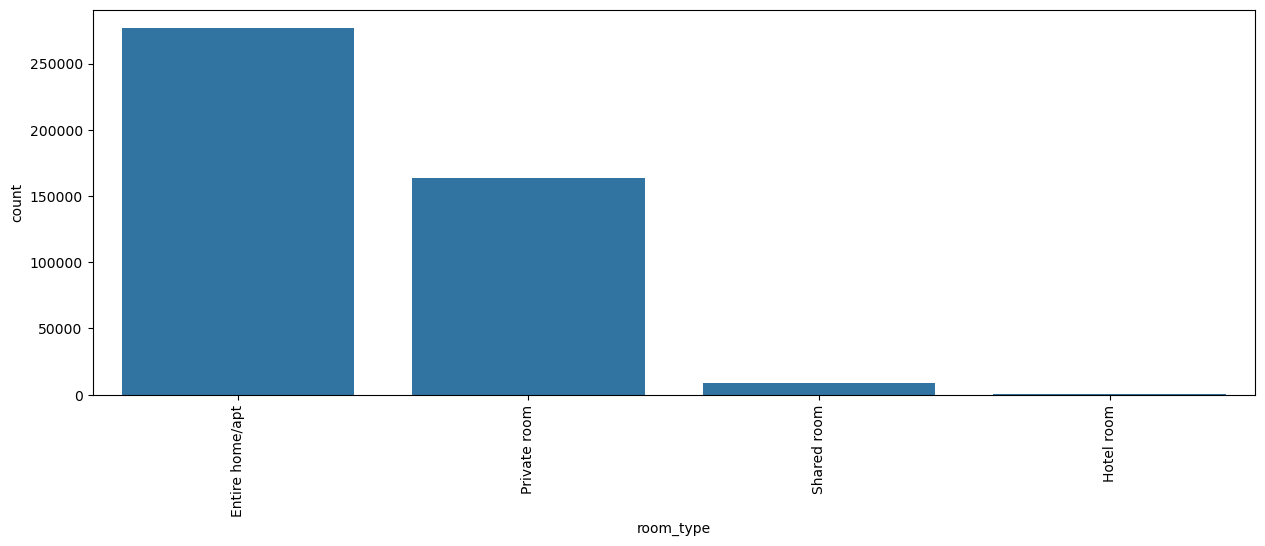

In [67]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['room_type'])
grafico.tick_params(axis='x',rotation= 90)

### bed_type

bed_type
Real Bed         440168
Pull-out Sofa      7131
Futon              1464
Airbed              901
Couch               315
Name: count, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    440168
Outros        9811
Name: count, dtype: int64


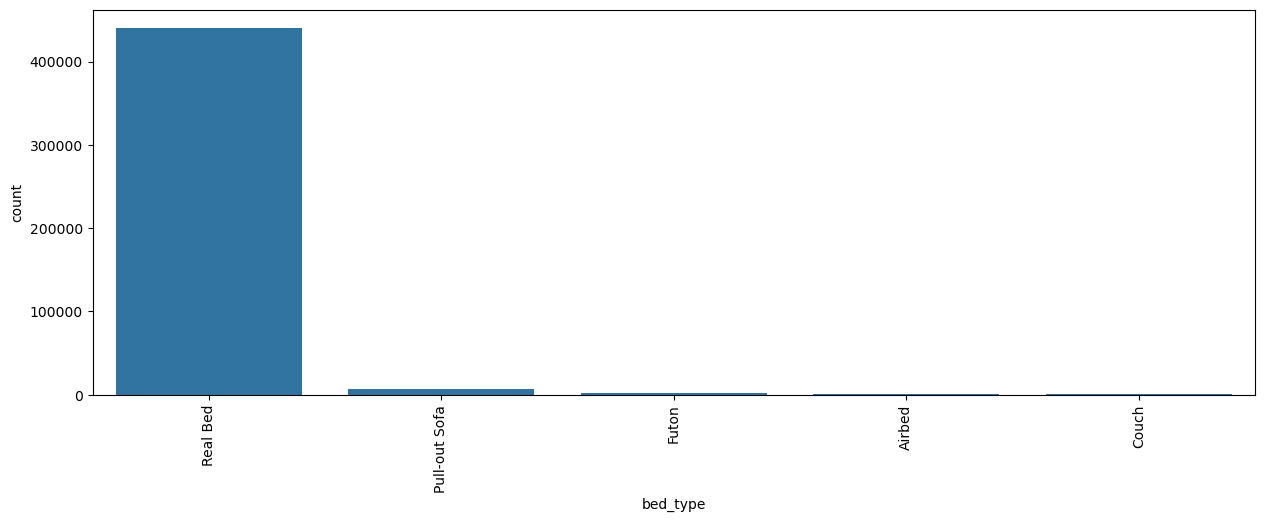

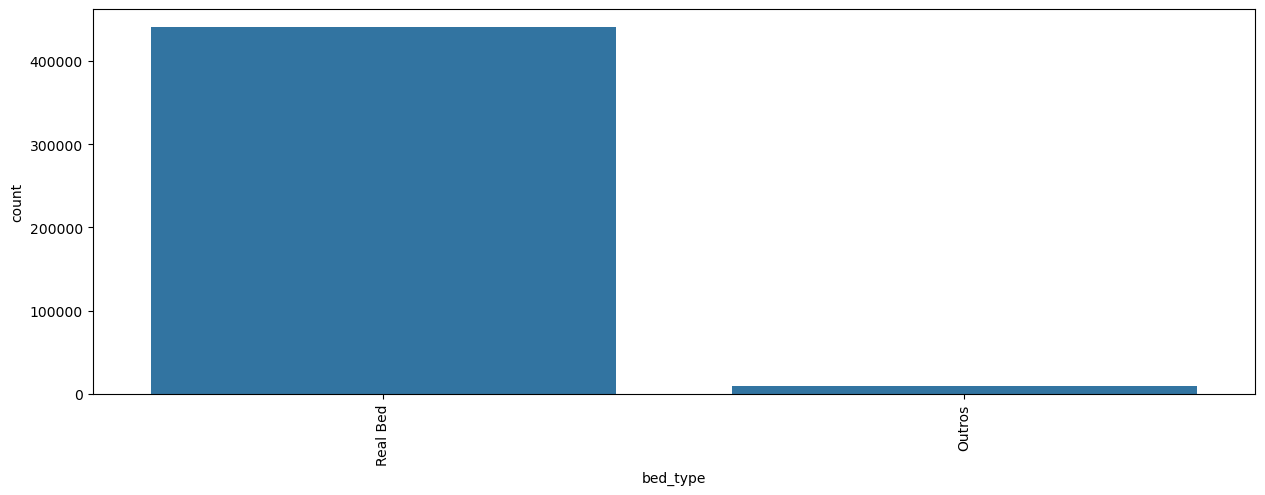

In [68]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['bed_type'])
grafico.tick_params(axis='x',rotation= 90)

#agrupando categorias de bed_type

tabela_bed_type = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []
for tipo in tabela_bed_type .index:
    if tabela_bed_type [tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type'] == tipo , ['bed_type']] = 'Outros'

print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['bed_type'])
grafico.tick_params(axis='x',rotation= 90)

### cancellation_policy

cancellation_policy
flexible                       199403
strict_14_with_grace_period    149469
moderate                        93831
strict                           7241
super_strict_30                    24
super_strict_60                    11
Name: count, dtype: int64
['strict', 'super_strict_30', 'super_strict_60']
cancellation_policy
flexible                       199403
strict_14_with_grace_period    149469
moderate                        93831
Strict                           7276
Name: count, dtype: int64


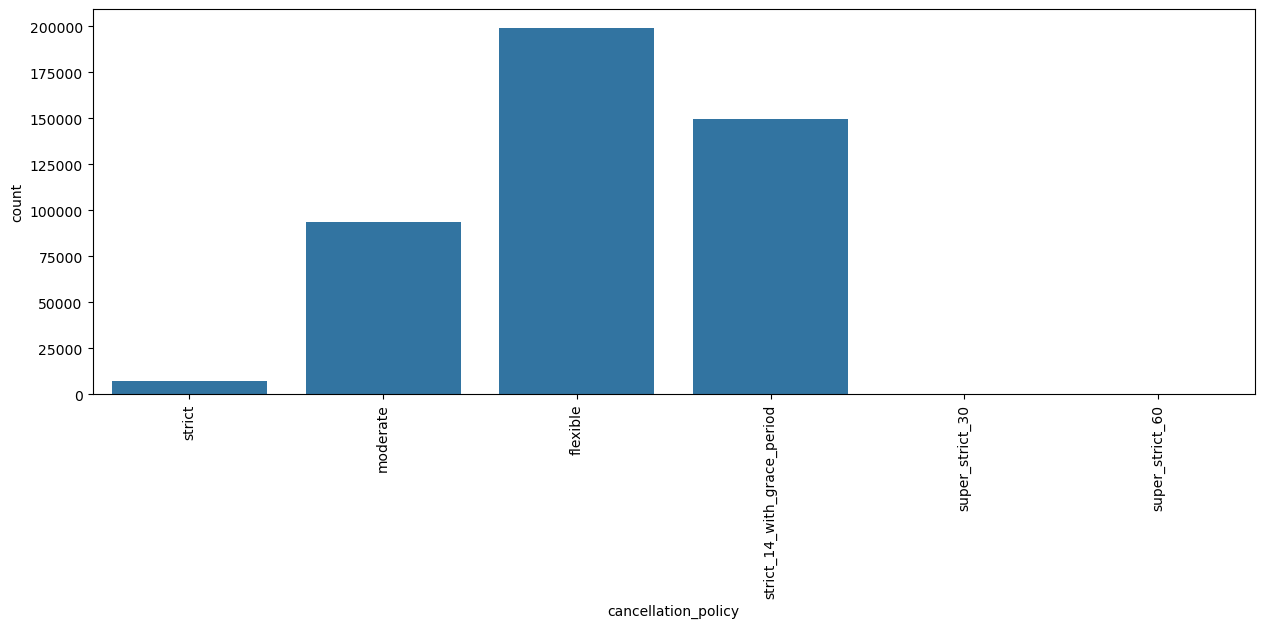

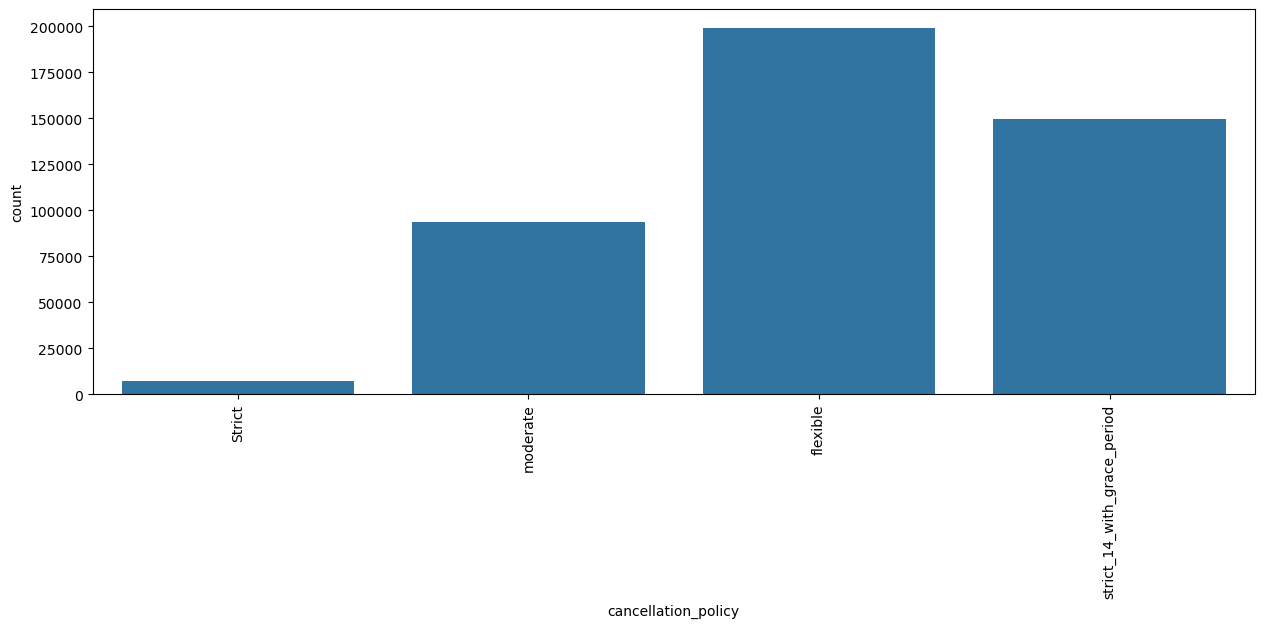

In [69]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['cancellation_policy'])
grafico.tick_params(axis='x',rotation= 90)

#agrupando categorias de cancellation_policy

tabela_cancellation = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []
for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo , ['cancellation_policy']] = 'Strict'

print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb['cancellation_policy'])
grafico.tick_params(axis='x',rotation= 90)

### amenities
Como temos uma diversidade muito grande de amenities e , às vezes, a mesma amenitie pode ser escrita de forma diferente, vamos avaliar a quantidade de amenities como um parâmetro para o nosso modelo

In [70]:
print(base_airbnb['amenities'].iloc[0].split(','))
print(len(base_airbnb['amenities'].iloc[0].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [71]:
base_airbnb = base_airbnb.drop('amenities', axis=1)

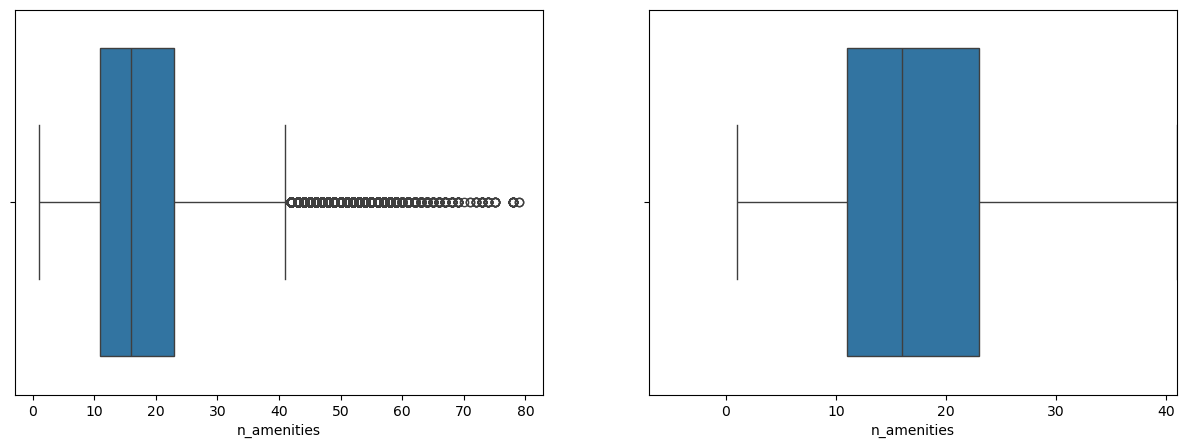

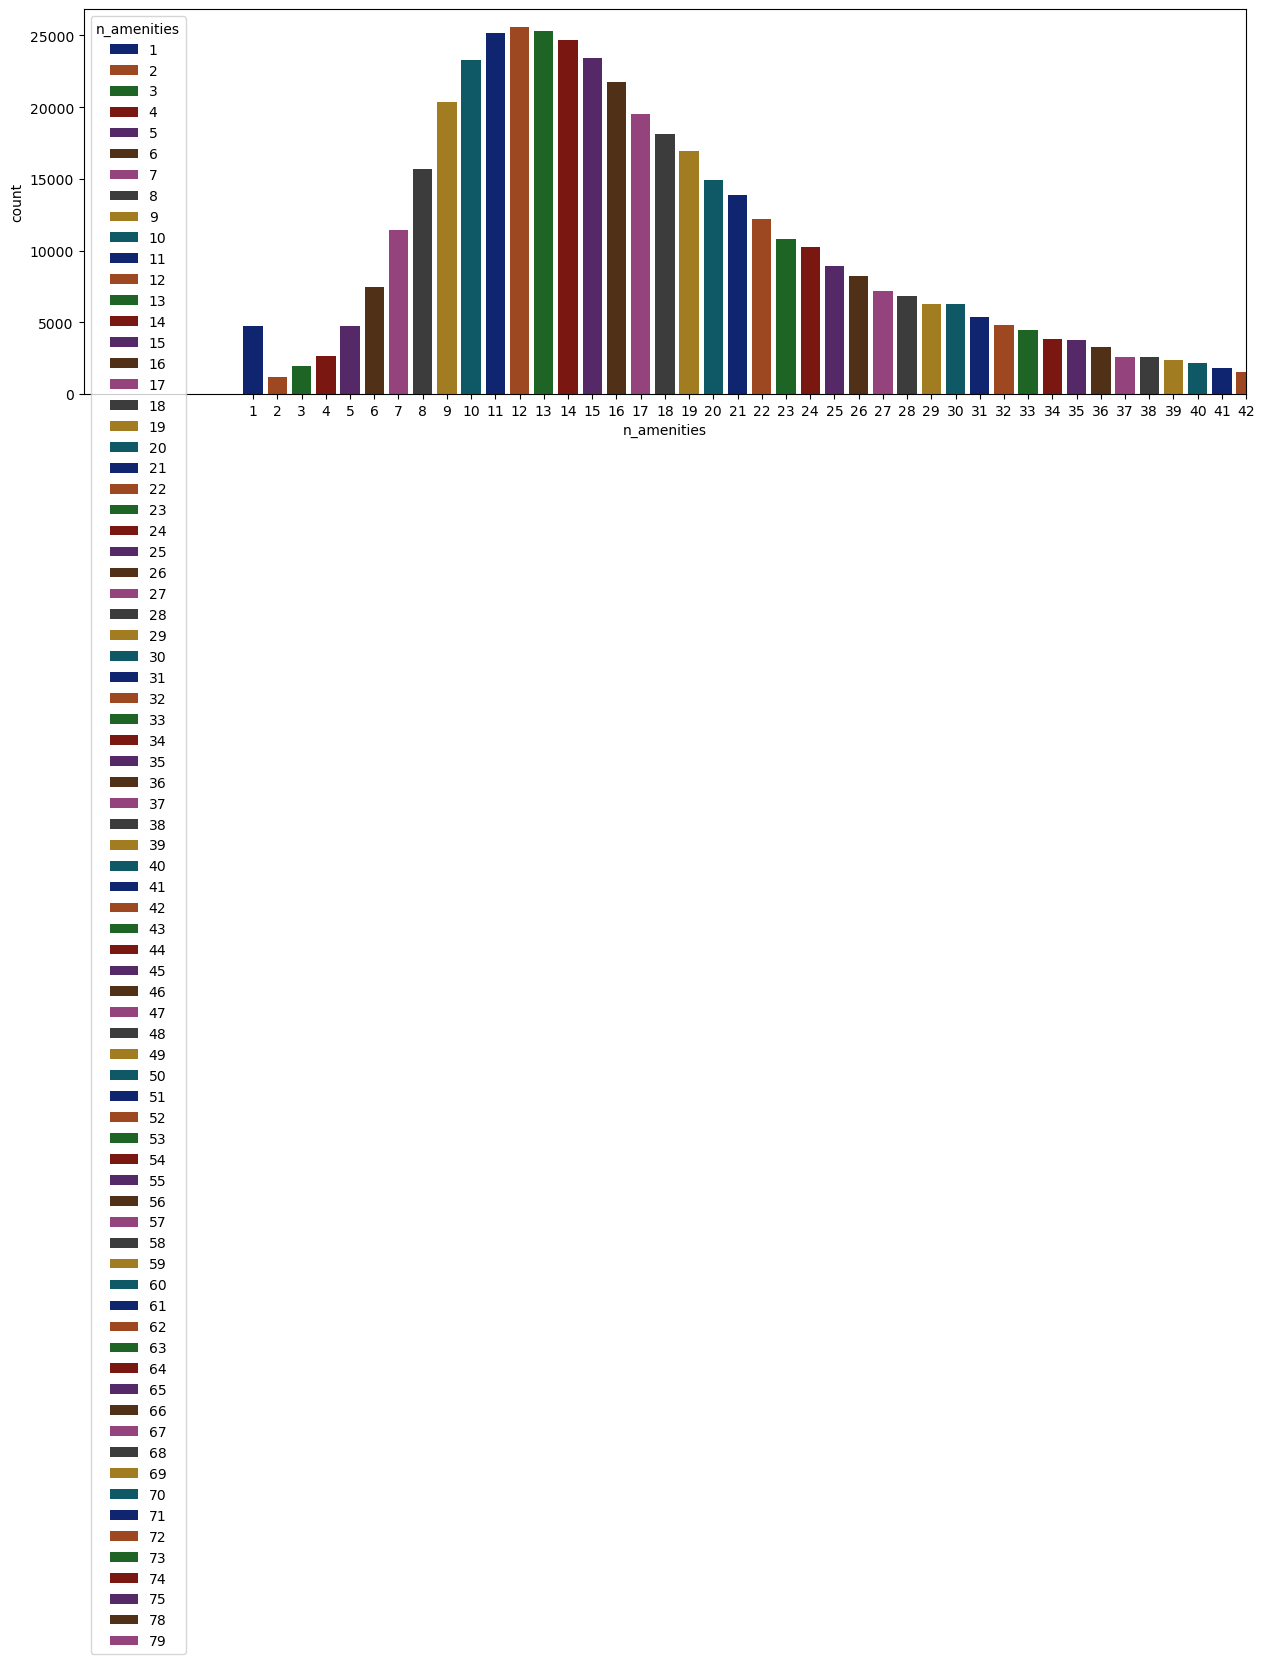

In [72]:
diagrama_caixa(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [73]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,'n_amenities')
print(f'{linhas_removidas} linhas removidas')

13291 linhas removidas


## Visualização de Mapa das Propriedades

In [74]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, mapbox_style='open-street-map', center=centro_mapa, zoom=10)

mapa.show()

### Encoding

Precisamos ajustar as features para facilitar o trabalho do modelo futuro(features de categorias true e false, etc.)
- Features de Valores True ou False, vamos substituir True por 1 e False por 0
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [75]:
colunas_tf = ['host_is_superhost','instant_bookable','is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()

for coluna in colunas_tf:
    base_airbnb_cod.loc[ base_airbnb_cod[coluna] == 't' , coluna] = 1
    base_airbnb_cod.loc[ base_airbnb_cod[coluna] == 'f' , coluna] = 0


In [76]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns= colunas_categorias, dtype=int)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   
5                          1                    0                      0   
6                          1                    0                      0   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                      0                0                  1   
3                      0                0                  1   
4                      0                0                  1   
5                      0                0                  1   
6                      0                0                  1   

   cancellation_policy_Strict  cancellation_policy_flexible  \
1                           1                             0   
3                           1                             0   
4                           1                             0   
5                           1                             0   
6                           1                             0   

   cancellation_policy_moderate  \
1                             0   
3                             0   
4                             0   
5                             0   
6                             0   

   cancellation_policy_strict_14_with_grace_period  
1                                                0  
3                                                0  
4                                                0  
5                                                0  
6                                                0  

[5 rows x 33 columns]

### Modelo de Previsão
- Métricas de Avaliação

In [77]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

- Escolha dos modelos a serem testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree

In [78]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()


modelos = {'RandomForest': modelo_rf,
           'LinearRegression': modelo_lr,
           'ExtraTrees': modelo_et}

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

- Separar os dados em treino e teste + Treino do Modelo

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10)


for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, Y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, Y_test, previsao))

Modelo RandomForest:
R²:96.65%
RSME:30.81
Modelo LinearRegression:
R²:27.82%
RSME:143.01
Modelo ExtraTrees:
R²:96.86%
RSME:29.85


### Análise do Melhor Modelo

- Modelo escolhido como melhor modelo: ExtraTreeRegressor

    Esse foi o modelo com maior valore de R² e ao mesmo tempo o menor valor de RSME. Como não tivemos uma grande diferença na velocidade de treino e de previsão desse modelo com o modelo de RandomForest

    O Modelo de regressão linear não obteve um resultado satisfatório, com valores de R² e RSME piores.

- Resultado das Métricas de avaliações no modelo vencedor:<br>
Modelo ExtraTrees:<br>
R²: 97.51%<br>
RSME: 41.84

0
latitude                                         0.117602
longitude                                        0.108284
bedrooms                                         0.100184
n_amenities                                      0.095637
extra_people                                     0.086498
accommodates                                     0.074055
room_type_Entire home/apt                        0.058436
minimum_nights                                   0.058215
bathrooms                                        0.052392
beds                                             0.050604
host_listings_count                              0.037943
instant_bookable                                 0.020050
cancellation_policy_flexible                     0.018795
cancellation_policy_moderate                     0.015449
host_is_superhost                                0.015135
ano                                              0.014170
property_type_Apartment                          0.013009
cancellation_policy_strict_14_with_grace_period  0.011173
property_type_House                              0.009558
room_type_Private room                           0.007256
property_type_Condominium                        0.006118
mes                                              0.005580
property_type_Outros                             0.004821
bed_type_Real Bed                                0.003993
bed_type_Outros                                  0.003837
property_type_Serviced apartment                 0.003251
property_type_Loft                               0.002927
room_type_Shared room                            0.002691
cancellation_policy_Strict                       0.001153
property_type_Guest suite                        0.000938
room_type_Hotel room                             0.000247
is_business_travel_ready                         0.000000

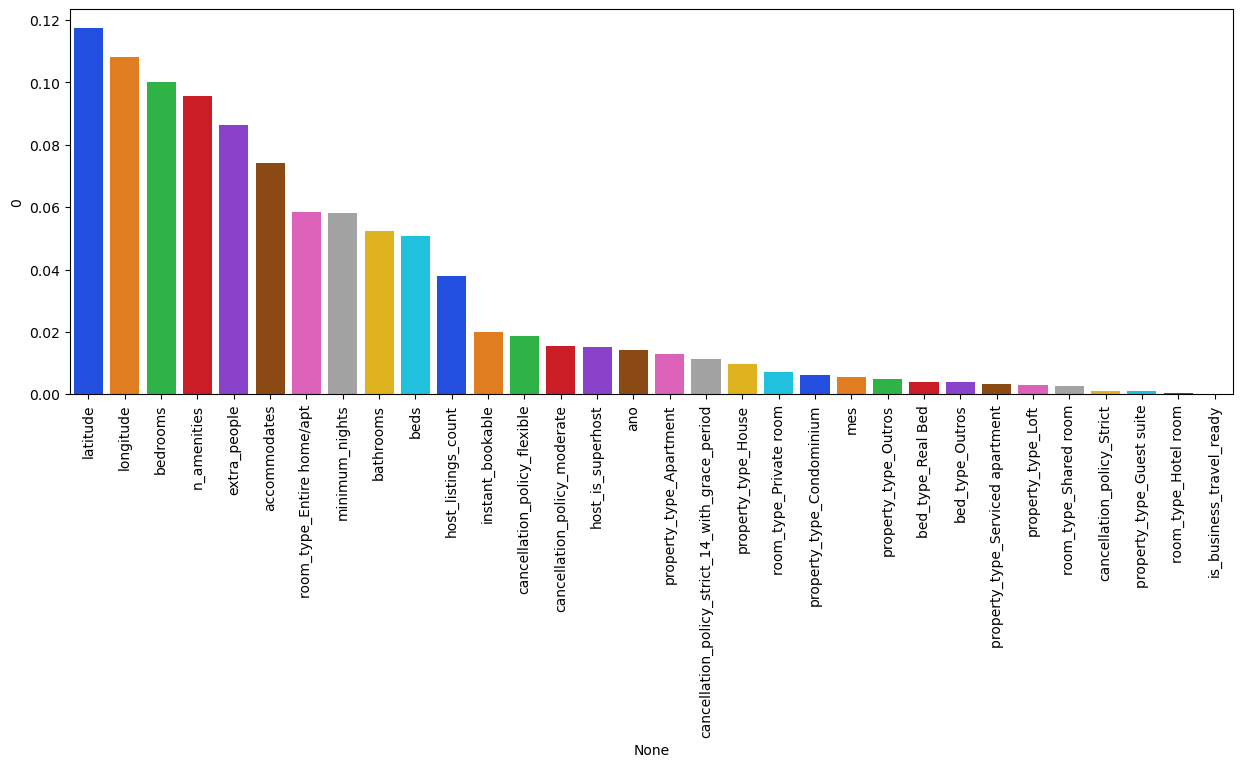

In [80]:
importancia_features = pd.DataFrame( modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0 , ascending =False)
display(importancia_features)

plt.figure(figsize=(15,5))
color = sns.color_palette("bright", len(importancia_features.index))
ax = sns.barplot( x= importancia_features.index, y=importancia_features[0], hue = importancia_features.index , palette= color)
ax.tick_params(axis='x', rotation=90)


### Ajustes e Melhorias no Melhor Modelo

In [81]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis=1)

y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis= 1)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10)



#treinar
modelo_et.fit(X_train, Y_train)
#testar
previsao = modelo_et.predict(X_test)
print(avaliar_modelo("ExtraTrees", Y_test, previsao))

Modelo ExtraTrees:
R²:96.85%
RSME:29.87


# Deploy do Projeto
- Passo 1 -> Criar arquivo do Modelo(joblib)
- Passo 2 -> Escolher a forma de deploy:

    - Arquivo exercutável + TKinter

    - Deploy com microsite(flask)
    
    - Deploy para uso direto(streamlit)

- Passo 3 -> Outro arquivo Python
- Passo 4 -> Importar o streamlit e criar código
- Passo 5 -> Atribuir ao botão o carregamento do modelo
- Passo 6 -> Deploy feito

In [82]:
x['price'] = y
x.to_csv('dados.csv')

In [83]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']